# **Assignment**    -  **Recommendation**

# <p style="padding:10px;background-color:#e1f013;margin:10;color:#0000FF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px;overflow:hidden;font-weight:30">***Recommendation***</p>

# Option 3: Recommendation
### Complexity: Intermediate
#### Task: Recommend item to the given customer id for a given date.
- User Story: User should be able to provide a Customer ID and Date, and program should be able to recommend item to be purchased.

In [1]:
# import required libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# <p style="padding:10px;background-color:#e1f013;margin:10;color:#0000FF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px;overflow:hidden;font-weight:30">***Know Your Data***</p>

# Cleaning data
- Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

###### While cleaning data we will perform following steps: 

- Remove duplicate rows 
- Handling missing values.
- Convert columns to appropriate datatypes.
- Adding impoertant columns

# Load the dataset

In [2]:
# Read the given data set
df = pd.read_csv("./data/Online_Retail.csv", encoding='ISO-8859-1')

In [3]:
# head count is reading first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# tail count is reading last 5 rows
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
# the shape of the data
df.shape

(541909, 8)

- Total rows of the records is  -- five hundred and forty-one thousand, nine hundred and nine and eight columns present in dataset

In [6]:
# all columns in a dataset
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Duplicates Records

In [8]:
# total duplicate values in a dataset
df.duplicated().sum()

5268

* data set having total duplicate records is '5268' so we need to drop those duplicates

In [9]:
# see the duplicate records in a dataset
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [10]:
# droping the duplicate records
df = df.drop_duplicates().reset_index(drop=True)

In [11]:
df.duplicated().sum()

0

* Now there is no duplicate records in a dataset

In [12]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Null & Missing values filteration

In [13]:
# if the dataset having any null or missing values
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


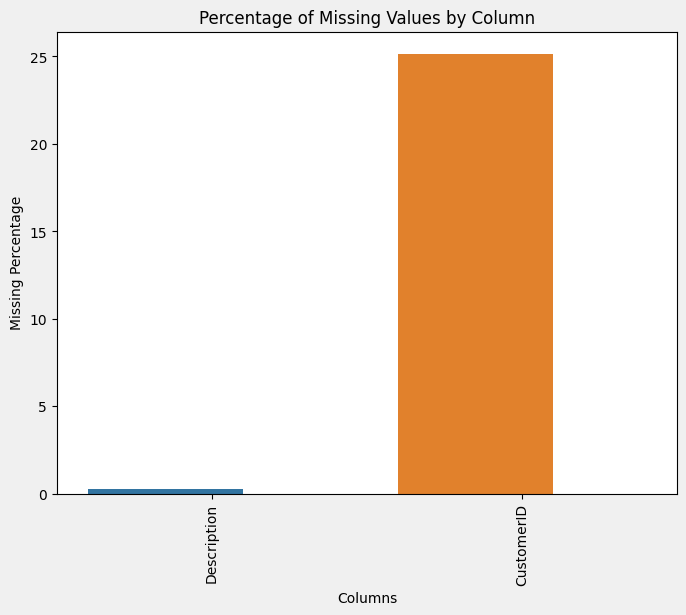

Description     0.270945
CustomerID     25.163377
dtype: float64


In [14]:
# Visualizing the missing values
# Checking Null Value by plotting

# Calculate missing percentage
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]

# Create the figure and axis objects
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=missing_percentage.index, y=missing_percentage)

fig = plt.gcf() 
fig.set_facecolor('#f0f0f0')

# Customize the plot
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.title('Percentage of Missing Values by Column')

for bar in ax.patches:
    bar.set_width(0.5)

# Show the plot
plt.show()

print(missing_percentage)

* Bar plot using the seaborn library to visualize the percentage of missing values in each column of a DataFrame.

- If the missing values in a column or feature are numerical, the values can be imputed by the mean of the complete cases of the variable. Mean can be replaced by median if the feature is suspected to have outliers.


- For a categorical feature, the missing values could be replaced by the mode of the column. The major drawback of this method is that it reduces the variance of the imputed variables. This method also reduces the correlation between the imputed variables and other variables because the imputed values are just estimates and will not be related to other values inherently.


In [15]:
# categorical missing values
categorical_null = [i for i in df.columns if (df[i].dtype == 'O' and df[i].isnull().sum() != 0)]
print(categorical_null)

['Description']


In [16]:
for i in categorical_null:
    df[i].fillna(df[i].mode()[0], inplace = True)

In [17]:
# numerical missing values
numerical_null = [i for i in df.columns if (df[i].dtype != 'O' and df[i].isnull().sum() != 0)]
print(numerical_null)

['CustomerID']


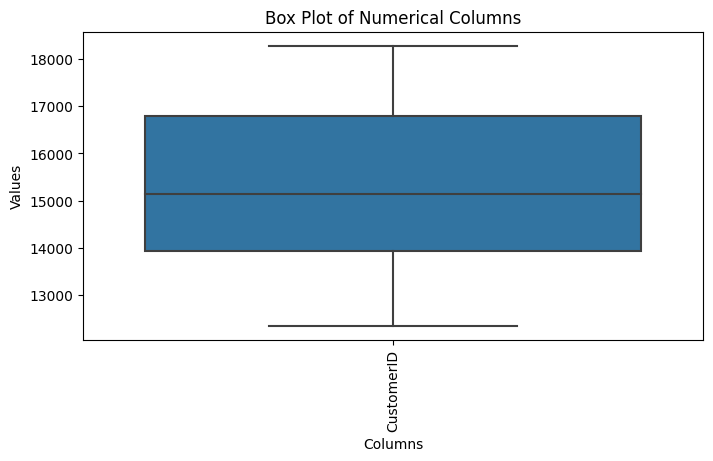

In [18]:
# Visualizing the Outliers present in data
# Create a box plot for each null numerical column
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[numerical_null])

# Customize the plot
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plot of Numerical Columns')

# Show the plot
plt.show()

In [19]:
for i in numerical_null:
    df[i].fillna(df[i].median(),inplace = True)

* filling missing values with the median for numerical columns and mode for categorical columns in data preprocessing, it helps to mitigate the impact of outliers and maintains the central tendency of the data.

In [20]:
# there is no missing and null values in a Dataframe
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

- now the data is cleaned 

# <p style="padding:10px;background-color:#e1f013;margin:10;color:#0000FF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px;overflow:hidden;font-weight:30">***Understanding Your Variables***</p>

In [21]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  536641 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   536641 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.8+ MB


In [22]:
# summary statistics for all columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,536641,25900,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,536641,4070,85123A,2301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,536641,4223,WHITE HANGING HEART T-LIGHT HOLDER,3811,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,536641.0,NaN,NaN,NaN,9.620029,219.130156,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,536641,23260,2011-10-31 14:41:00,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,536641.0,NaN,NaN,NaN,4.632656,97.233118,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,536641.0,NaN,NaN,NaN,15246.898157,1483.931554,12346.0,14367.0,15145.0,16241.0,18287.0
Country,536641,38,United Kingdom,490300,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <p style="padding:10px;background-color:#e1f013;margin:10;color:#0000FF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px;overflow:hidden;font-weight:30">***Data Wrangling***</p>

-  Data wrangling means to make the data more suitable for exploration and modeling by addressing various data quality issues.

    - Numerical_columns will contain all columns with numerical data types (integers, floats).
    - Categorical_columns will contain all columns with non-numerical data types (e.g., objects, strings).

In [23]:
numerical_columns = []
categorical_columns = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        numerical_columns.append(column)
    else:
        categorical_columns.append(column)


In [24]:
print(numerical_columns)

['Quantity', 'UnitPrice', 'CustomerID']


In [25]:
print(categorical_columns)

['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  536641 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   536641 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.8+ MB


In [27]:
# coverting float data type into int 
df['CustomerID'] = df['CustomerID'].astype(int)

In [28]:
df['CustomerID']

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
536636    12680
536637    12680
536638    12680
536639    12680
536640    12680
Name: CustomerID, Length: 536641, dtype: int32

In [29]:
df['InvoiceDate'].head()

0    2010-12-01 08:26:00
1    2010-12-01 08:26:00
2    2010-12-01 08:26:00
3    2010-12-01 08:26:00
4    2010-12-01 08:26:00
Name: InvoiceDate, dtype: object

In [30]:
# covert datatime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%Y-%m-%d %H:%M:%S')

In [31]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
536636   2011-12-09 12:50:00
536637   2011-12-09 12:50:00
536638   2011-12-09 12:50:00
536639   2011-12-09 12:50:00
536640   2011-12-09 12:50:00
Name: InvoiceDate, Length: 536641, dtype: datetime64[ns]

In [32]:
# Extract just the date portion
df['InvoiceDate'] = df['InvoiceDate'].dt.date

In [33]:
df['InvoiceDate']

0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
536636    2011-12-09
536637    2011-12-09
536638    2011-12-09
536639    2011-12-09
536640    2011-12-09
Name: InvoiceDate, Length: 536641, dtype: object

In [34]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
426209,573576,22698,PINK REGENCY TEACUP AND SAUCER,1,2011-10-31,5.79,14096,United Kingdom
284259,562031,22485,SET OF 2 WOODEN MARKET CRATES,2,2011-08-01,12.75,16984,United Kingdom
434978,574328,15056P,EDWARDIAN PARASOL PINK,3,2011-11-04,5.95,13081,United Kingdom
464287,576503,22647,CERAMIC LOVE HEART MONEY BANK,12,2011-11-15,1.45,17540,United Kingdom
13506,537434,35653,VINTAGE BEAD NOTEBOOK,1,2010-12-06,5.91,15145,United Kingdom
212314,555566,21713,CITRONELLA CANDLE FLOWERPOT,4,2011-06-05,2.10,14659,United Kingdom
163682,550774,22457,NATURAL SLATE HEART CHALKBOARD,6,2011-04-20,2.95,14626,United Kingdom
191909,553538,22900,SET 2 TEA TOWELS I LOVE LONDON,4,2011-05-17,3.25,15855,United Kingdom
127127,547251,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-03-22,0.55,17865,United Kingdom
469759,576837,82001S,SILVER RECORD COVER FRAME,1,2011-11-16,7.46,15145,United Kingdom


# <p style="padding:10px;background-color:#e1f013;margin:10;color:#0000FF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 10px 10px;overflow:hidden;font-weight:30">***Final Result of Recommendation***</p>

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')
# Input customer ID and date
customer_id = input("User Wil Enter Customer ID: ")
date = input("User Wil Enter Date (YYYY-MM-DD): ")

# Filter the data for the given customer ID and date
data = df[(df['CustomerID'] == int(customer_id)) & (df['InvoiceDate'].dt.strftime('%Y-%m-%d').str.startswith(date))]

# Analyze the customer's purchase history and recommend the top 10 items
if not data.empty:
     # Purchase History
    purchase_history = data.groupby('StockCode')['Quantity'].sum().reset_index()
    
    # Print the purchase history and recommended top 10 products
    print("\nPurchase History for Customer", customer_id, "on Date", date)
    print(purchase_history)
    
    print("===="*20)
    
    # Sort the purchase history by quantity in descending order and select the top 5
    recommended_products = purchase_history.sort_values(by='Quantity', ascending=False).head(5)
    
    print("\nTop 5 Recommended Products:")
    for index, row in recommended_products.iterrows():
        print("StockCode:", row['StockCode'])

else:
    print("No data found for the provided customer ID and date.")


User Wil Enter Customer ID: 15159
User Wil Enter Date (YYYY-MM-DD): 2011-06-08
